# heart disease prediction using machine learning

### 1.1 About heart disease

 One of the most vital organs in the body is the heart, failure of which accounts for 31% of fatalities worldwide. With the help of machine learning, we can perform early heart disease diagnosis and reduce the risk of mortality by identifying the heart disease indicators in their nascent states. Several ML techniques are applied in the field of medicine to understand the patterns in the data and derive predictions from them. Healthcare records typically have huge volume data with intricate systems. ML algorithms can handle big data, which then can be investigated for informative data. Machine learning algorithms use both current and past data to produce predictions.

### 1.2 Problem Statement 

We are given a dataset which consists of patients from which we have to predict who has heart disease

### 1.3 Source 
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).
data link: https://archive.ics.uci.edu/ml/datasets/Heart+Disease.

### 1.4. Real-world/Business objectives and constraints.
there are no specific constraints but since its a problem which deals with health of people and money saving we will try to increase accuracy as much as possible

### 1.5 About the dataset
There are 297 records of patients, with no null values. Also there are 13 attributes in the dataset as follows.
1. age: age in years
2. sex: sex (1 = male; 0 = female)
3. cp: chest pain type -- Value 0: typical angina -- Value 1: atypical angina -- Value 2: non-anginal pain -- Value 3: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg: resting electrocardiographic results -- Value 0: normal -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment -- Value 0: upsloping -- Value 1: flat -- Value 2: downsloping
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect and the label
Target variable: condition: 0 = no disease, 1 = disease

## Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest,chi2, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

## Importing Dataset

In [2]:
# reading the data using pandas
data=pd.read_csv('heart_cleveland_upload.csv')
print("Number of data points:",data.shape[0])


Number of data points: 297


In [3]:
df=data.copy() ## Making a copy of dataset

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [6]:
print("number of columns in our dataset",len(df.columns),sep="\n")
# name of columns in our dataset
print(df.columns)

number of columns in our dataset
14
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition'],
      dtype='object')


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [8]:
#Checking for missing values
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

There is no feature in the dataset with missing values.

In [9]:
# Renaming columns so its easier to use
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'condition']

In [10]:
# Renaming cateorical data for easier understanding:

df['sex'] = df['sex'].map({0:'female',1:'male'})

df['chest_pain_type'] = df['chest_pain_type'].map({3:'asymptomatic', 1:'atypical_angina', 2:'non_anginal_pain', 0:'typical_angina'})

df['fasting_blood_sugar'] = df['fasting_blood_sugar'].map({0:'less_than_120mg/ml',1:'greater_than_120mg/ml'})

df['rest_ecg'] = df['rest_ecg'].map({0:'normal',1:'ST-T_wave_abnormality',2:'left_ventricular_hypertrophy'})

df['exercise_induced_angina'] = df['exercise_induced_angina'].map({0:'no',1:'yes'})

df['st_slope'] = df['st_slope'].map({0:'upsloping',1:'flat',2:'downsloping'})

df['thalassemia'] = df['thalassemia'].map({1:'fixed_defect',0:'normal',2:'reversable_defect'})

df['condition'] = df['condition'].map({0:'no_disease', 1:'has_disease'})


# EDA

# univariate analysis

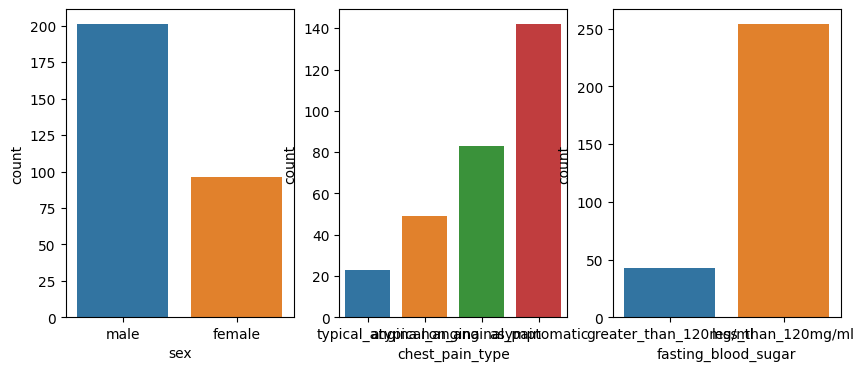

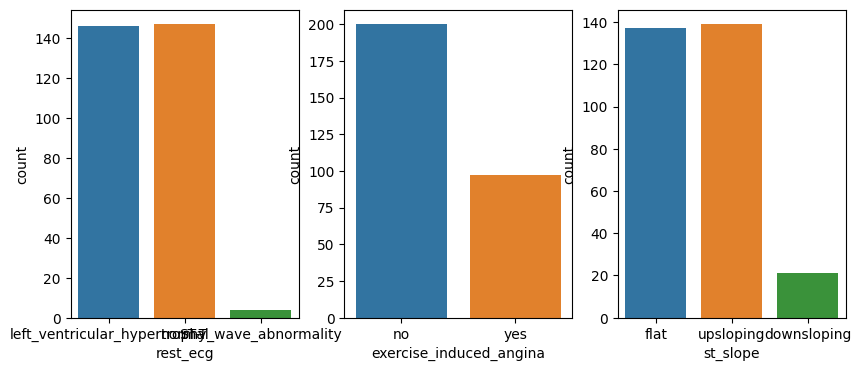

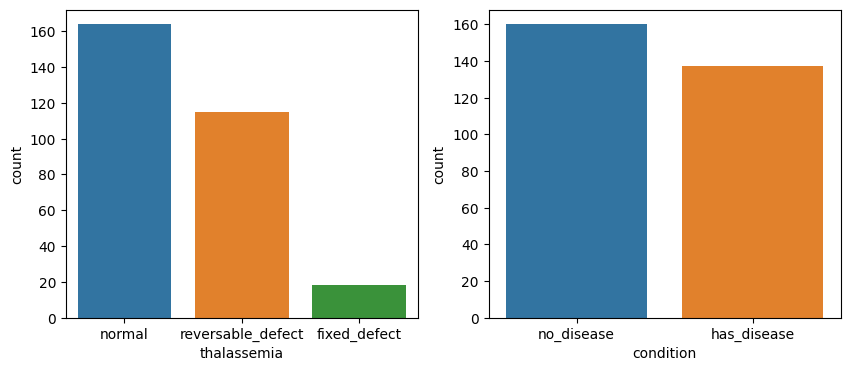

In [11]:
# https://stackoverflow.com/questions/71584096/seaborn-countplot-generated-in-for-loop-as-subplots-coming-only-visible-in-the-l
# Display categorical data:
c = df.select_dtypes(include = 'object').copy()
x=list(c.columns)
cols = x[:3]
f, axs = plt.subplots(1,3, figsize=(10, 4))
for ax, col in zip(axs, cols):
    sns.countplot(data=df, x=col, ax=ax)
cols = x[3:6]
f, axs = plt.subplots(1,3, figsize=(10, 4))
for ax, col in zip(axs, cols):
    sns.countplot(data=df, x=col, ax=ax)
cols = x[6:8]
f, axs = plt.subplots(1,2, figsize=(10, 4))
for ax, col in zip(axs, cols):
    sns.countplot(data=df, x=col, ax=ax)

    

1. we can see that number of males are twice that of female <br>
2. people who have no disease in dataset is higher <br>
3. and people with thalassemia have highest normal <br>
4. people less than blood sugar 120 are more <br>
5. in chestpain asympotamatic cases are higher <br>
6.excercise induced angina cases are less  <br>

In [12]:
# here we are storing the numerical features of data for creating histograms
c = df.select_dtypes(include = 'object').copy()
x=list(c.columns)
data_num = df.drop(x,axis=1)

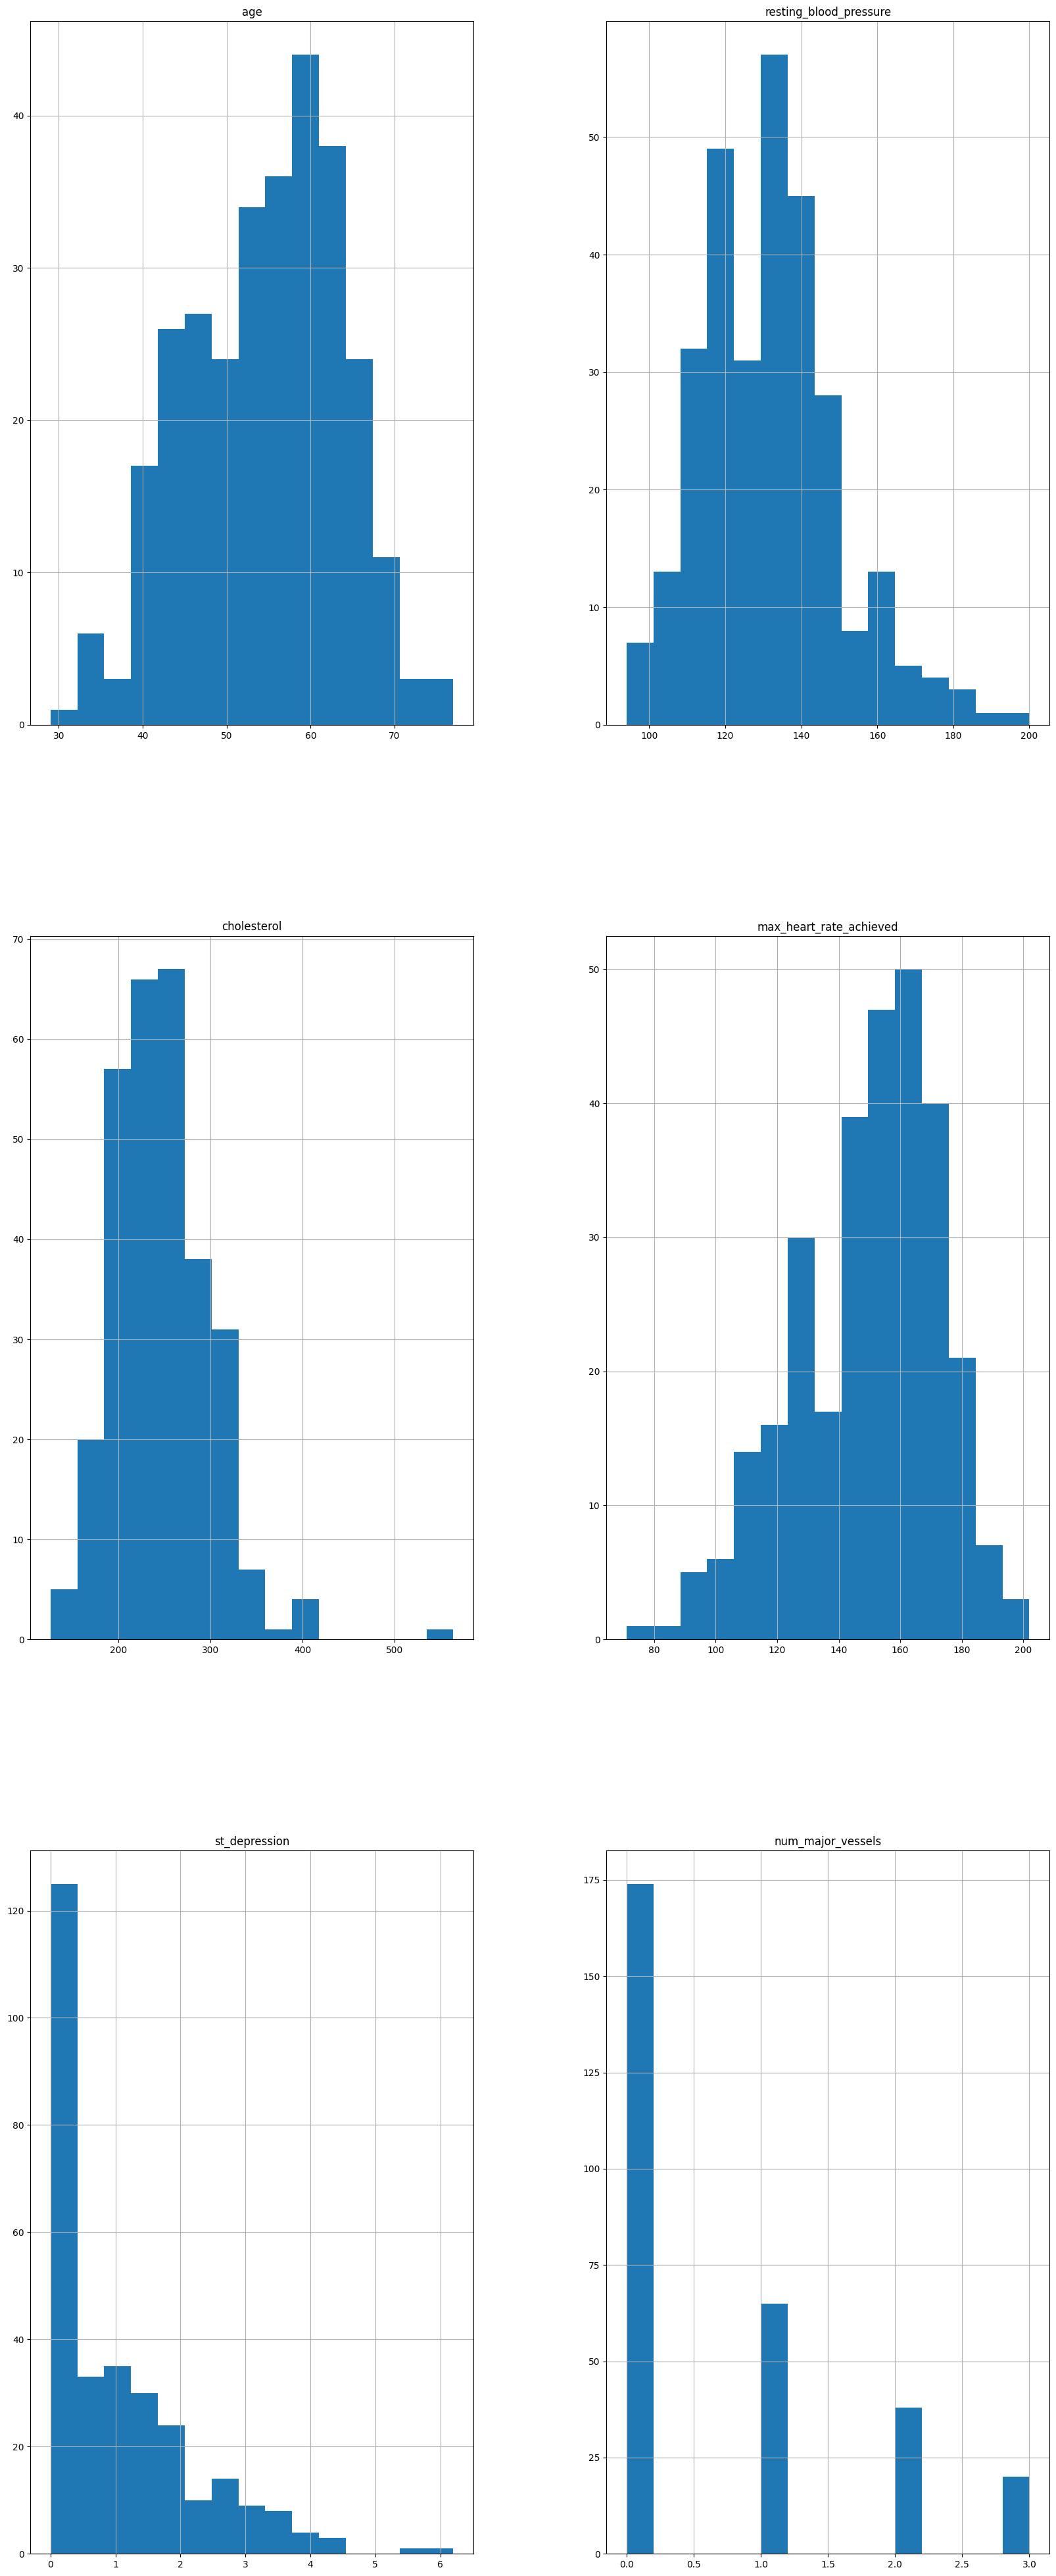

In [13]:
data_num.hist(bins=15, figsize=(20, 50));

histogram for the numerical features shows us that people in age group 58-61 are significant in data <br>
most people have blood pressure is in the range of 125-130 <br>
cholestrol is in the range of 210-280 <br>

In [14]:
# here we are using pandas_profiling for univariate analysis
import pandas_profiling
pandas_profiling.ProfileReport(df)

C:\Users\varce\AppData\Local\Temp\ipykernel_10648\3800728097.py:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

1.Here i did pandas profiling and first look at the overview here whle looking at variables <br>
2.chest_pain_type is highly overall correlated with condition which is good  <br>
3.thalassemia is highly overall correlated with condition which is good for predicting output variable <br>
4.condition is highly overall correlated with chest_pain_type and 1 other fields <br>
5.st_depression has 96 (32.3%) zeros which is redundant so we may have to delete the feature <br>
6. there are no missing values in dataset columns <br>

C:\Users\varce\AppData\Local\Temp\ipykernel_10648\2348618136.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr()


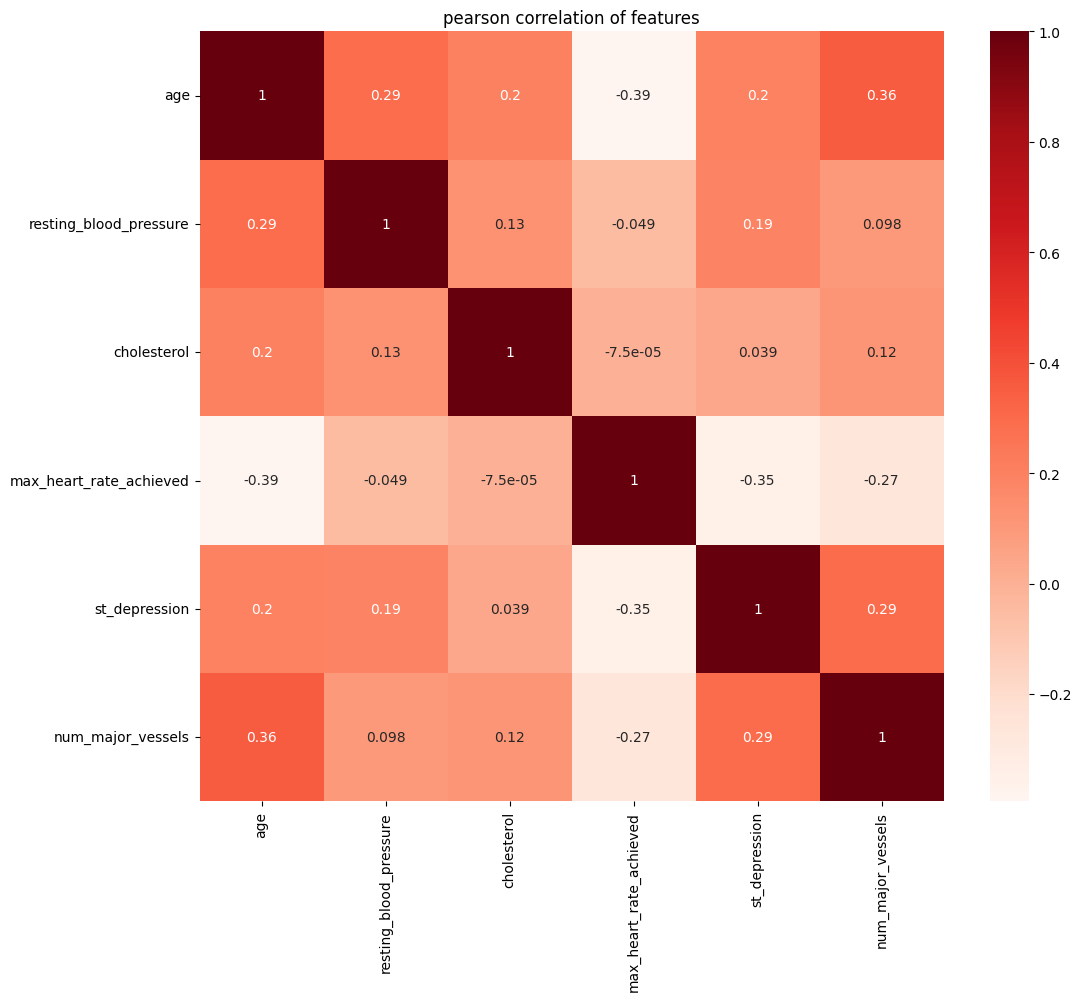

In [15]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.title("pearson correlation of features")
plt.show()


# box plot

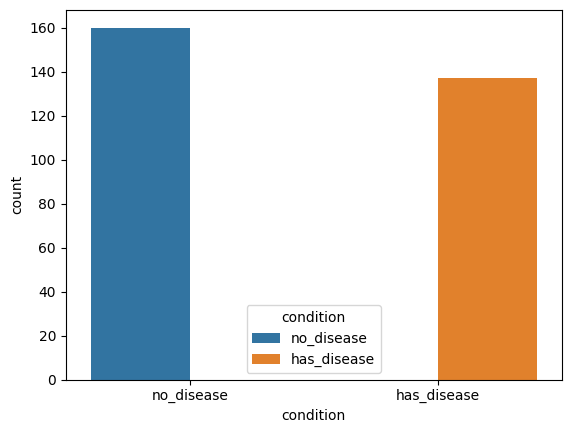

In [16]:
# analysis of features with respect to the features
sns.countplot(x="condition", data=df,hue="condition")
plt.show()

people with no disease are more


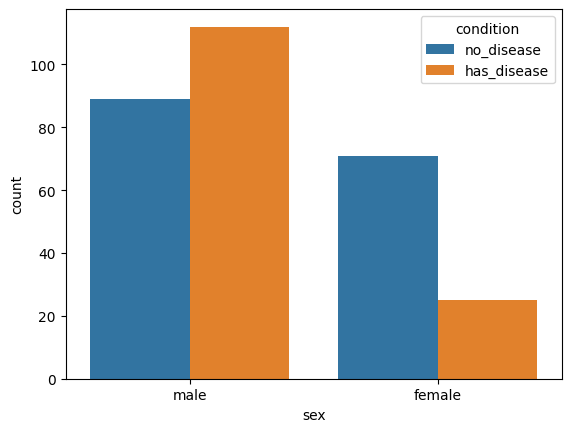

In [17]:
# males have more diseases when compared to females 
sns.countplot(x="sex", data=df,hue="condition")
plt.show()


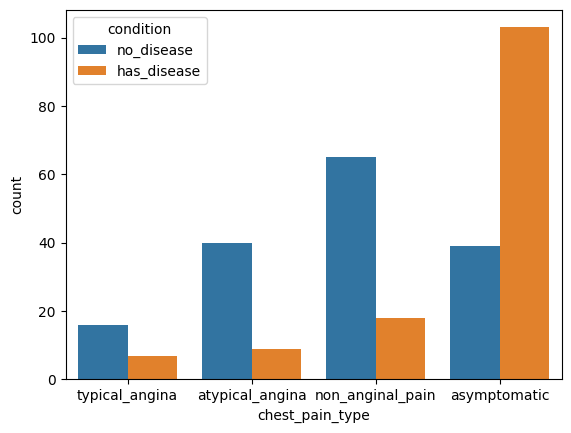

In [18]:
# people who have asymptomatic chest pain are more prone to heart disease
sns.countplot(x="chest_pain_type", data=df,hue="condition")
plt.show()

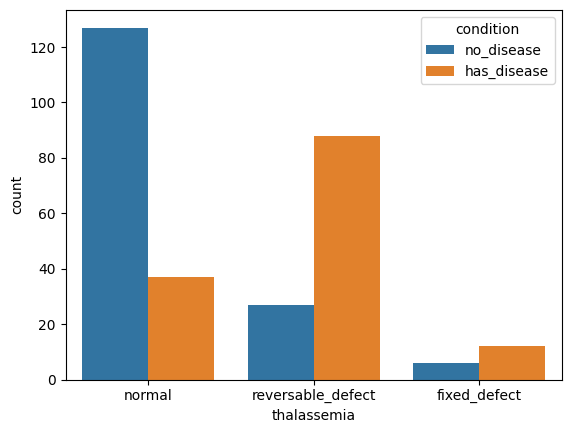

In [19]:
# people who have thalessemia levels as normal have no disease
sns.countplot(x="thalassemia", data=df,hue="condition")
plt.show()


As the age of patient increases, likelihood of having heart disease also increases.

Some outliers can be seen in the dataset.

## Splitting the data into training and testing

In [20]:
x= data.drop('condition', axis=1)
y = data['condition']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=1)

In [21]:
print('X_train-', x_train.size)
print('X_test-',x_test.size)
print('y_train-', y_train.size)
print('y_test-', y_test.size)

X_train- 3081
X_test- 780
y_train- 237
y_test- 60


In [22]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
159,68,1,3,144,193,1,0,141,0,3.4,1,2,2
107,54,1,2,125,273,0,2,152,0,0.5,2,1,0
219,58,0,3,170,225,1,2,146,1,2.8,1,2,1
217,58,1,3,146,218,0,0,105,0,2.0,1,1,2
39,56,1,1,130,221,0,2,163,0,0.0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,60,1,3,117,230,1,0,160,1,1.4,0,2,2
255,52,1,3,128,255,0,0,161,1,0.0,0,1,2
72,76,0,2,140,197,0,1,116,0,1.1,1,0,0
235,56,1,3,130,283,1,2,103,1,1.6,2,0,2


In [23]:
# code for printing the confusion matrix
#https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823i
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):

    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Logistic Regression

In [67]:
accuracies = {}

lr = LogisticRegression()
lr.fit(x_train, y_train)

# getting the training Set Predictions
y_train_pred = lr.predict(x_train)

# getting the test Set Predictions
y_test_pred = lr.predict(x_test)
accuracies['lr']=metrics.accuracy_score(y_test,y_test_pred)

C:\Users\varce\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [68]:
print(classification_report(y_train_pred,y_train))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87       134
           1       0.82      0.86      0.84       103

    accuracy                           0.86       237
   macro avg       0.85      0.86      0.85       237
weighted avg       0.86      0.86      0.86       237



In [69]:
print(classification_report(y_test_pred,y_test))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        30
           1       0.89      0.83      0.86        30

    accuracy                           0.87        60
   macro avg       0.87      0.87      0.87        60
weighted avg       0.87      0.87      0.87        60



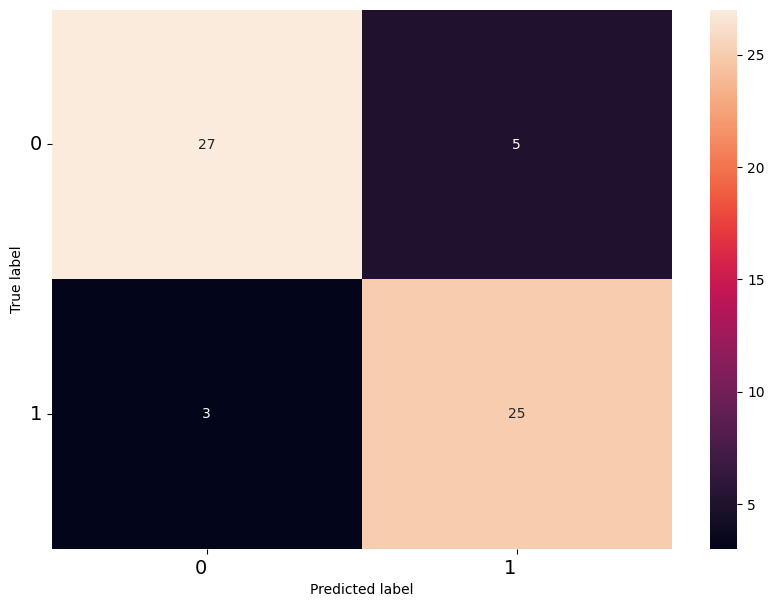

In [70]:

print_confusion_matrix(confusion_matrix(y_test,y_test_pred),['0','1'])

## KNN

In [71]:
knn = KNeighborsClassifier(n_neighbors=2) 
knn.fit(x_train, y_train)
y_train_pred1 = knn.predict(x_train)
y_test_pred1 = knn.predict(x_test)


In [72]:
print(classification_report(y_train_pred1,y_train))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83       180
           1       0.52      1.00      0.69        57

    accuracy                           0.78       237
   macro avg       0.76      0.86      0.76       237
weighted avg       0.89      0.78      0.80       237



In [73]:
print(classification_report(y_test_pred1,y_test))

              precision    recall  f1-score   support

           0       0.66      0.54      0.59        39
           1       0.36      0.48      0.41        21

    accuracy                           0.52        60
   macro avg       0.51      0.51      0.50        60
weighted avg       0.55      0.52      0.53        60



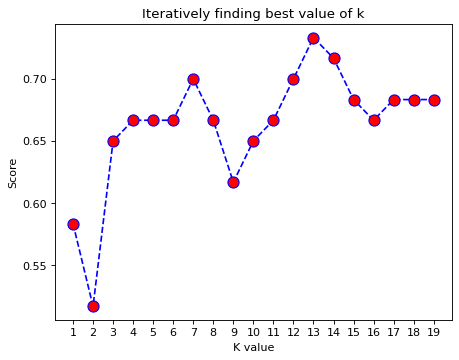

Maximum KNN Test Accuracy is 73.33% at K = 13


In [74]:
# try to find best k value
scoreList = []
for i in range(1, 20):
    knn1 = KNeighborsClassifier(n_neighbors=i)  # n_neighbors means k
    knn1.fit(x_train, y_train)
    scoreList.append(knn1.score(x_test, y_test))

plt.figure(dpi=80)
plt.plot(range(1, 20), scoreList,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.xticks(np.arange(1, 20, 1))
plt.title("Iteratively finding best value of k")
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList) * 100
print("Maximum KNN Test Accuracy is {:.2f}%".format(acc),"at K =",scoreList.index(max(scoreList))+1)

In [76]:
knn2 = KNeighborsClassifier(n_neighbors=13) 
knn2.fit(x_train, y_train)
y_train_pred1 = knn2.predict(x_train)
y_test_pred1 = knn2.predict(x_test)
accuracies['knn']=(metrics.accuracy_score(y_test,y_test_pred1))

In [77]:
print(classification_report(y_train_pred1,y_train))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74       138
           1       0.63      0.70      0.66        99

    accuracy                           0.70       237
   macro avg       0.70      0.70      0.70       237
weighted avg       0.71      0.70      0.71       237



In [78]:
print(classification_report(y_test_pred1,y_test))

              precision    recall  f1-score   support

           0       0.72      0.77      0.74        30
           1       0.75      0.70      0.72        30

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.73      0.73      0.73        60



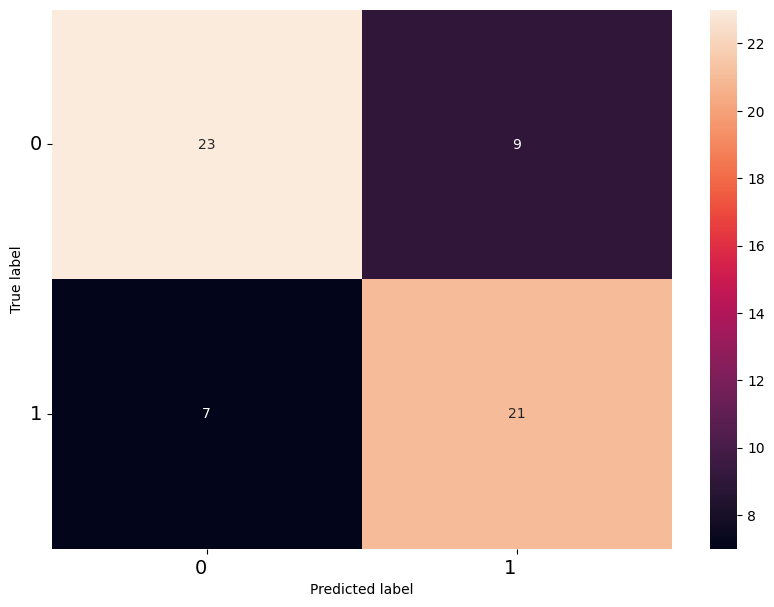

In [79]:

print_confusion_matrix(confusion_matrix(y_test,y_test_pred1),['0','1'])

## Naïve Bayes

In [81]:
nb = GaussianNB()
nb.fit(x_train, y_train)
y_train_pred2 = nb.predict(x_train)
y_test_pred2 = nb.predict(x_test)

acc = nb.score(x_test, y_test) * 100

accuracies['nb']=(metrics.accuracy_score(y_test,y_test_pred2))

In [82]:
print(classification_report(y_train_pred2,y_train))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       132
           1       0.83      0.86      0.84       105

    accuracy                           0.86       237
   macro avg       0.85      0.86      0.86       237
weighted avg       0.86      0.86      0.86       237



In [83]:
print(classification_report(y_test_pred2,y_test))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86        31
           1       0.86      0.83      0.84        29

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60



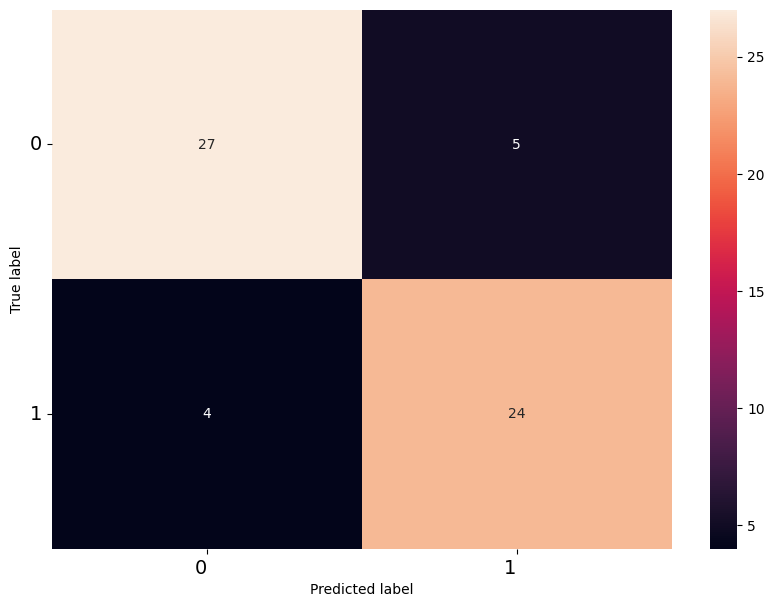

In [84]:

print_confusion_matrix(confusion_matrix(y_test,y_test_pred2),['0','1'])

## Decision Tree

In [85]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

acc = dtc.score(x_test, y_test) * 100

print("Decision Tree Test Accuracy is {:.2f}%".format(acc))

Decision Tree Test Accuracy is 73.33%


In [86]:
#hyperparameter tuning for decision tree
param_dist = {'max_depth': np.arange(1, 7),
             'max_features': np.arange(1,7) , "min_samples_leaf": np.arange(1,7),"criterion": ["gini", "entropy"]}
tree_cv = RandomizedSearchCV(dtc, param_dist, cv = 5)
  
tree_cv.fit(x, y)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([1, 2, 3, 4, 5, 6]),
                                        'max_features': array([1, 2, 3, 4, 5, 6]),
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6])})

In [87]:
(tree_cv.best_params_)

{'min_samples_leaf': 4,
 'max_features': 2,
 'max_depth': 3,
 'criterion': 'entropy'}

In [89]:
dtc1 = DecisionTreeClassifier(criterion= 'gini',
 max_depth= 6,
 max_features= 3,
 min_samples_leaf= 1)
dtc1.fit(x_train, y_train)
y_train_pred3 = dtc1.predict(x_train)
y_test_pred3 = dtc1.predict(x_test)

accuracies['dt']=(metrics.accuracy_score(y_test,y_test_pred3))

In [90]:
print(classification_report(y_train_pred3,y_train))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92       129
           1       0.90      0.91      0.90       108

    accuracy                           0.91       237
   macro avg       0.91      0.91      0.91       237
weighted avg       0.91      0.91      0.91       237



In [91]:
print(classification_report(y_test_pred3,y_test))

              precision    recall  f1-score   support

           0       0.69      0.76      0.72        29
           1       0.75      0.68      0.71        31

    accuracy                           0.72        60
   macro avg       0.72      0.72      0.72        60
weighted avg       0.72      0.72      0.72        60



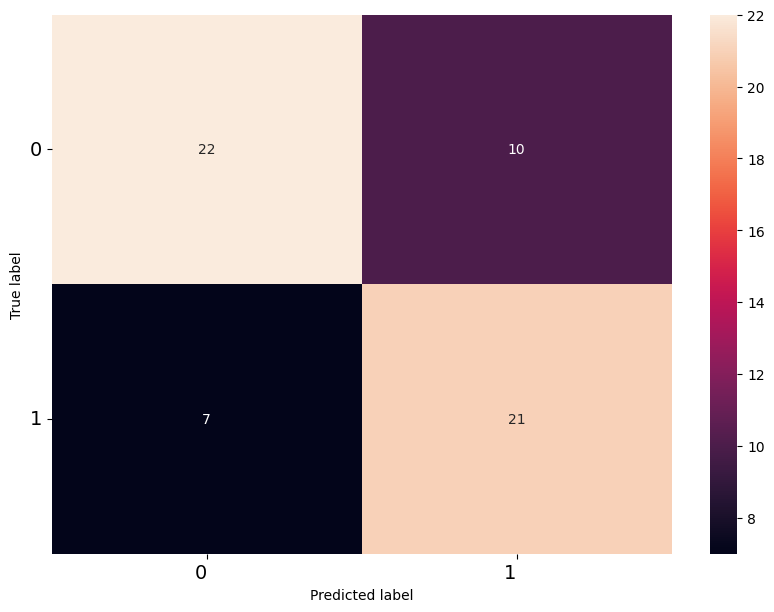

In [92]:

print_confusion_matrix(confusion_matrix(y_test,y_test_pred3),['0','1'])

## SVM

In [94]:
svm = SVC()
svm.fit(x_train, y_train)
y_test_pred4 = svm.predict(x_test)

accuracies['svm']=(metrics.accuracy_score(y_test,y_test_pred4))

In [95]:
print(classification_report(y_test_pred4,y_test))

              precision    recall  f1-score   support

           0       0.88      0.74      0.80        38
           1       0.64      0.82      0.72        22

    accuracy                           0.77        60
   macro avg       0.76      0.78      0.76        60
weighted avg       0.79      0.77      0.77        60



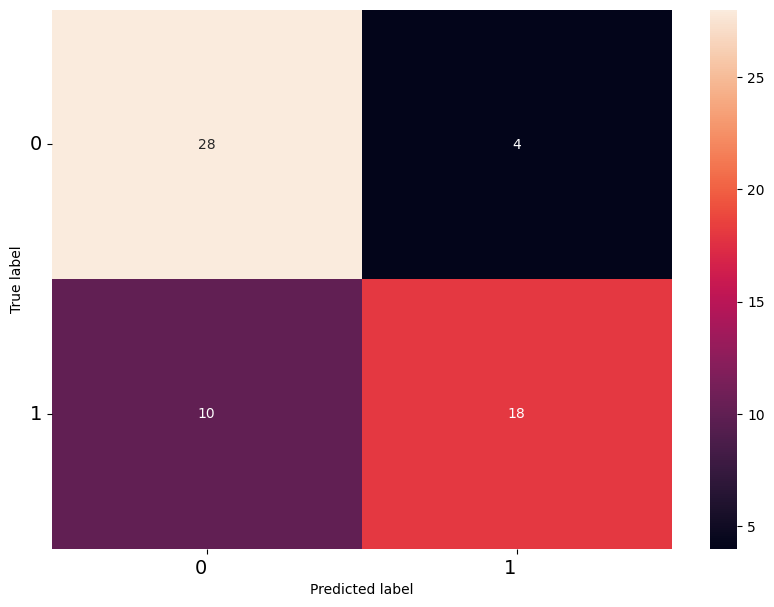

In [96]:

print_confusion_matrix(confusion_matrix(y_test,y_test_pred4),['0','1'])

## Random Forest

In [97]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_test_pred5 = rf.predict(x_test)

In [98]:
print(classification_report(y_test_pred5,y_test))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87        28
           1       0.93      0.81      0.87        32

    accuracy                           0.87        60
   macro avg       0.87      0.87      0.87        60
weighted avg       0.87      0.87      0.87        60



In [99]:
#hyperparameter tuning for Random forest
param_tuned = {'n_estimators': [50, 60, 70, 80, 90, 100],
                'max_features': [5,6,7,8,9,10,11,12]}
gscv_Rf = RandomizedSearchCV(rf, 
                        param_tuned, 
                        cv=5,
                        verbose=True, n_jobs=-1)

In [100]:
gscv_results = gscv_Rf.fit(x_train, y_train)
gscv_results.best_score_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


0.8227836879432624

In [101]:
gscv_results.best_params_

{'n_estimators': 80, 'max_features': 12}

In [106]:
rf1 = RandomForestClassifier(max_features= 12, n_estimators= 90)
rf1.fit(x_train, y_train)
y_train_pred5 = rf1.predict(x_train)
y_test_pred5 = rf1.predict(x_test)

acc = rf1.score(x_test, y_test) * 100

accuracies['rf']=(metrics.accuracy_score(y_test,y_test_pred5))

In [107]:
print(classification_report(y_train_pred5,y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       128
           1       1.00      1.00      1.00       109

    accuracy                           1.00       237
   macro avg       1.00      1.00      1.00       237
weighted avg       1.00      1.00      1.00       237



In [108]:
print(classification_report(y_test_pred5,y_test))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85        27
           1       0.93      0.79      0.85        33

    accuracy                           0.85        60
   macro avg       0.85      0.86      0.85        60
weighted avg       0.86      0.85      0.85        60



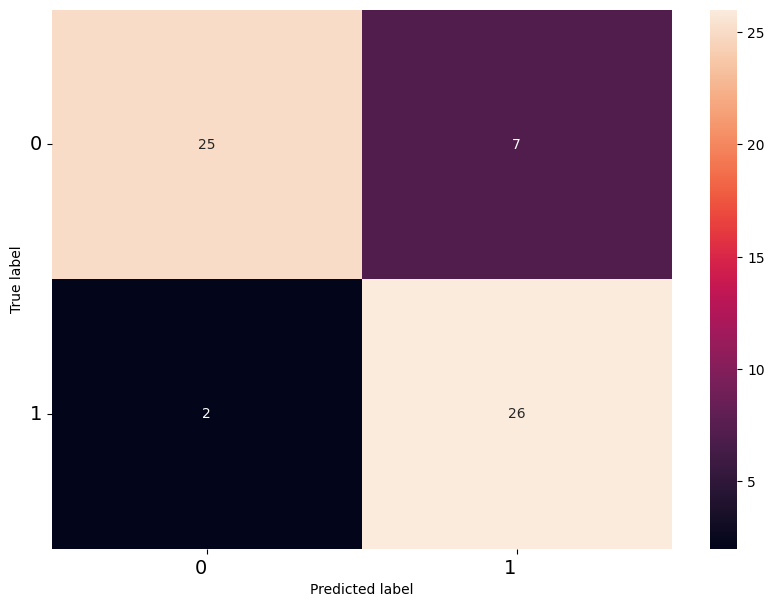

In [109]:

print_confusion_matrix(confusion_matrix(y_test,y_test_pred5),['0','1'])

combined accuracy
Test confusion matrix
accuracy is 0.88
Precision is 0.86
Recall is 0.89
f1score is 0.88


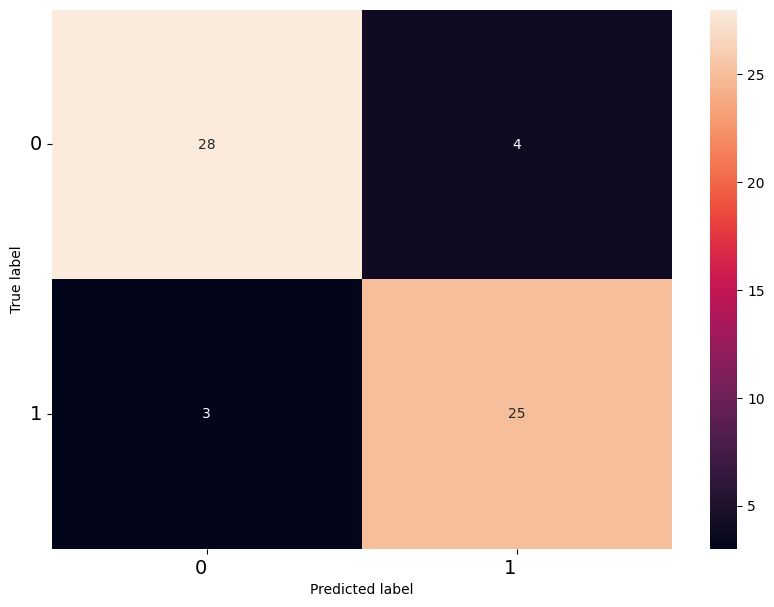

In [59]:
# in the believe function i wrote the code for weighted average with markdown
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *
import sklearn.metrics as metrics  
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
# function to do weighted average
# used decision tree
X_train_fs=x_train
X_test_fs=x_test
dtc1.fit(X_train_fs,y_train)
decision =dtc1
sig_clf = CalibratedClassifierCV(decision, method="sigmoid")
sig_clf.fit(X_train_fs, y_train)
    # used calibrated classifer to get the probability using decision tree
predict_y_decision = sig_clf.predict_proba(X_test_fs)
    # used random forest classifier
rf.fit(X_train_fs, y_train)
rm =rf
sig_clf = CalibratedClassifierCV(rm, method="sigmoid")
sig_clf.fit(X_train_fs, y_train)
    # used calibrated classifer to get the correct probability predicitons
predict_y_rm = sig_clf.predict_proba(X_test_fs)
one,two=predict_y_decision,predict_y_rm
z=[]
    # added the probability of both the predictions
for i in range(len(one)):
  z.append([one[i][0]+two[i][0],one[i][1]+two[i][1]])
predicted=[]
# using argmax got the output and checked for the answer
for i in range(len(z)):
  predicted.append(np.argmax(z[i]))
print_confusion_matrix(confusion_matrix(y_test,predicted),['0','1'])
print("combined accuracy")
print("Test confusion matrix")
# printing the accuracy preicison,recall,f1-score from logistic regression
fpr, tpr, thresholds = metrics.roc_curve(y_test,predicted)
print('accuracy is {0:.2f}'.format(metrics.accuracy_score(y_test,predicted)))
print("Precision is {0:.2f}".format(precision_score(y_test,predicted)))
print("Recall is {0:.2f}".format(recall_score(y_test,predicted)))
print("f1score is {0:.2f}".format(f1_score(y_test,predicted)))
avgweight_auc=format(metrics.auc(fpr, tpr))
avgweight_f1=format(f1_score(y_test,predicted))

In [103]:
accuracies['hybrid']=(metrics.accuracy_score(y_test,predicted))

In [110]:
accuracies

{'lr': 0.8666666666666667,
 'knn': 0.7333333333333333,
 'nb': 0.85,
 'dt': 0.7166666666666667,
 'svm': 0.7666666666666667,
 'hybrid': 0.8833333333333333,
 'rf': 0.85}

In [121]:
 sortedaccuracies={k: v for k, v in sorted(accuracies.items(), key=lambda item: item[1],reverse=True)}

<BarContainer object of 7 artists>

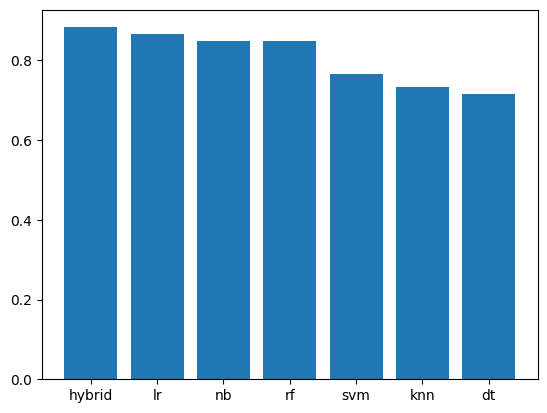

In [123]:
plt.bar(sortedaccuracies.keys(),sortedaccuracies.values())